#### Diffusion Model 

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.models import Model
from keras.layers import Input

In [7]:
# Load and preprocess data (replace with your own data loading)
fileIN = '../jet_notebooks/Data-MLtutorial/JetDataset/jetImage_7_100p_30000_40000.h5'
f = h5py.File(fileIN)
jet_images = np.array(f.get('jetImage')).astype('float32') / 255.0


In [8]:


# Assuming 'image_size' is defined
image_size = jet_images.shape[1]
input_shape = (image_size, image_size, 1)

# Add noise to the images to create 'noisy_images' (you can adjust the noise level)
noise_factor = 0.5
noisy_images = jet_images + noise_factor * np.random.normal(size=jet_images.shape)


In [9]:

# Denoising autoencoder architecture
def build_denoising_autoencoder(input_shape):
    input_layer = Input(shape=input_shape)
    
    # Encoder
    enc_conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    enc_pool1 = MaxPooling2D((2, 2), padding='same')(enc_conv1)
    enc_conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(enc_pool1)
    encoded = MaxPooling2D((2, 2), padding='same')(enc_conv2)
    
    # Decoder
    dec_conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    dec_upsamp1 = UpSampling2D((2, 2))(dec_conv1)
    dec_conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(dec_upsamp1)
    dec_upsamp2 = UpSampling2D((2, 2))(dec_conv2)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(dec_upsamp2)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoded)
    return autoencoder

# Build the denoising autoencoder model
denoising_autoencoder = build_denoising_autoencoder(input_shape)

# Compile the denoising autoencoder
denoising_autoencoder.compile(optimizer='adam', loss='mean_squared_error')



In [ ]:
# Train the denoising autoencoder
history = denoising_autoencoder.fit(noisy_images, jet_images, epochs=10, batch_size=32, validation_split=0.1)



In [ ]:
# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Denoising Autoencoder Training Loss')
plt.legend()
plt.show()


In [ ]:
# Generate denoised images using the trained autoencoder
denoised_images = denoising_autoencoder.predict(noisy_images)

# Display original, noisy, and denoised images side by side
num_samples = 5  # Number of samples to visualize
for i in range(num_samples):
    original_image = jet_images[i]
    noisy_image = noisy_images[i]
    denoised_image = denoised_images[i]
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.xlim(40,60)
    plt.ylim(40,60)
    
    plt.subplot(1, 3, 2)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('Noisy Image')
    
    plt.subplot(1, 3, 3)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image')
    plt.xlim(40,60)
    plt.ylim(40,60)
    
    plt.show()

#### Trying with a complex model

In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.models import Model

In [11]:
# Load and preprocess data (replace with your own data loading)
fileIN = '../jet_notebooks/Data-MLtutorial/JetDataset/jetImage_7_100p_30000_40000.h5'
f = h5py.File(fileIN)
jet_images = np.array(f.get('jetImage')).astype('float32') / 255.0


In [12]:


# Assuming 'image_size' is defined
image_size = jet_images.shape[1]
input_shape = (image_size, image_size, 1)

# Add noise to the images to create 'noisy_images' (you can adjust the noise level)
# noise_factor = 0.5
noisy_images = jet_images + np.random.normal(loc=0, scale=0.2, size=jet_images.shape)


In [13]:
def build_complex_denoising_autoencoder(input_shape):
    input_layer = Input(shape=input_shape)
    
    # Encoder
    enc_conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    enc_pool1 = MaxPooling2D((1, 1), padding='same')(enc_conv1)
    
    enc_conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(enc_pool1)
    enc_pool2 = MaxPooling2D((1, 1), padding='same')(enc_conv2)
    
    enc_conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(enc_pool2)
    encoded = MaxPooling2D((1, 1), padding='same')(enc_conv3)
    
    # Decoder
    dec_conv1 = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
    dec_upsamp1 = UpSampling2D((1, 1))(dec_conv1)
    
    dec_conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(dec_upsamp1)
    dec_upsamp2 = UpSampling2D((1, 1))(dec_conv2)
    
    dec_conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(dec_upsamp2)
    dec_upsamp3 = UpSampling2D((1, 1))(dec_conv3)
    
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(dec_upsamp3)
    
    # Create the complex denoising autoencoder model
    autoencoder = Model(input_layer, decoded)
    return autoencoder


In [14]:
# Build the complex denoising autoencoder model
complex_denoising_autoencoder = build_complex_denoising_autoencoder(input_shape)

# Compile the complex denoising autoencoder
complex_denoising_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the complex denoising autoencoder
history = complex_denoising_autoencoder.fit(noisy_images, jet_images, epochs=5, batch_size=32, validation_split=0.1)



Epoch 1/5
282/282 [==============================] - 125s 402ms/step - loss: 0.0023 - val_loss: 4.5956e-04
Epoch 2/5
282/282 [==============================] - 113s 401ms/step - loss: 4.6991e-04 - val_loss: 4.5956e-04
Epoch 3/5
282/282 [==============================] - 113s 401ms/step - loss: 4.6991e-04 - val_loss: 4.5956e-04
Epoch 4/5
282/282 [==============================] - 113s 401ms/step - loss: 4.6991e-04 - val_loss: 4.5956e-04
Epoch 5/5
282/282 [==============================] - 113s 401ms/step - loss: 4.6991e-04 - val_loss: 4.5956e-04


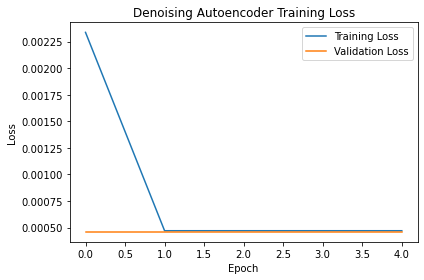

In [15]:
# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Denoising Autoencoder Training Loss')
plt.legend()
plt.tight_layout()  # Add this line to adjust the padding
plt.show()


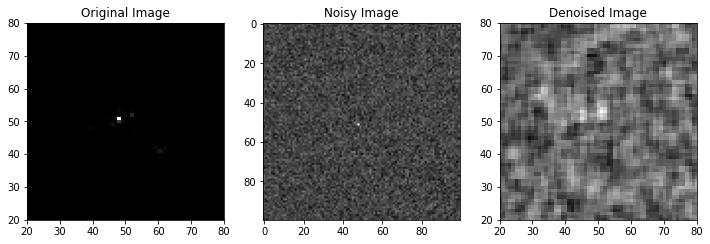

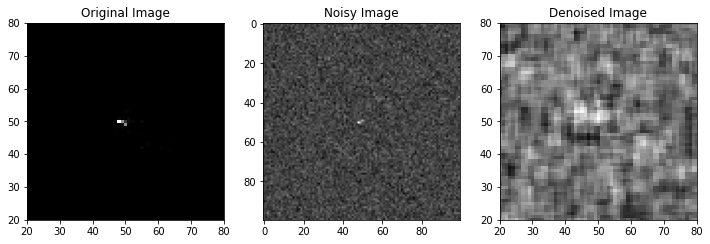

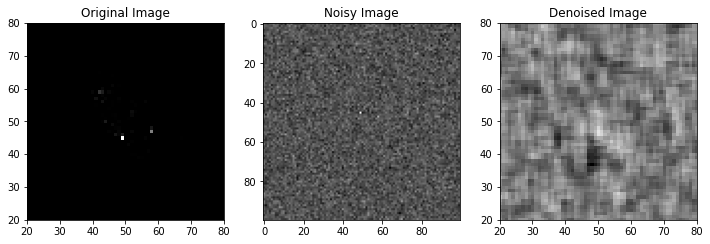

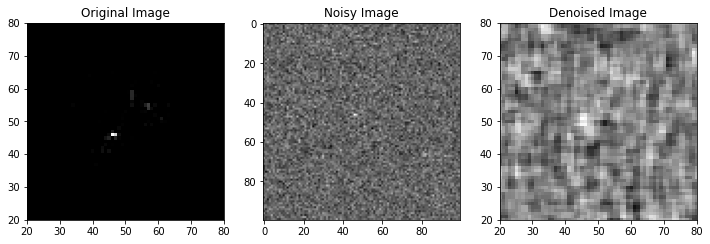

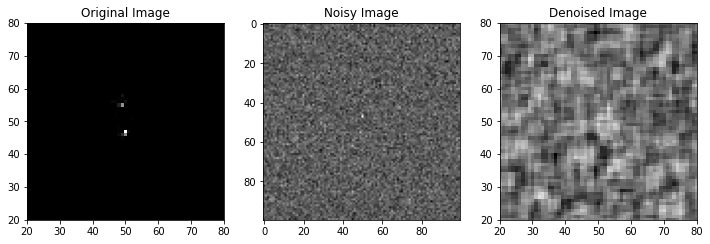

In [17]:
# Generate denoised images using the trained autoencoder
denoised_images = denoising_autoencoder.predict(noisy_images)

# Display original, noisy, and denoised images side by side
num_samples = 5  # Number of samples to visualize
for i in range(num_samples):
    original_image = jet_images[i]
    noisy_image = noisy_images[i]
    denoised_image = denoised_images[i]
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.xlim(20,80)
    plt.ylim(20,80)
    
    plt.subplot(1, 3, 2)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('Noisy Image')
    
    plt.subplot(1, 3, 3)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image')
    plt.xlim(20,80)
    plt.ylim(20,80)
    
    plt.show()